# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size = 1, precision = 30):
    size = ((size,) if type(size) == int else size) 
    size += (precision,)

    mask = 1 << (np.arange(precision) + 1)

    return ((coin(size) * mask) / (1 << (precision + 1))).sum(axis=-1)


def plot_uniform_density(size=200):
    data = uniform(size)

    plt.figure(figsize = (20, 12))
    plt.gca().set_facecolor("#cfcfcf")

    plt.scatter(x = data, y = np.zeros(size), alpha = 0.4, c = "r", label = "Случайные величины")
    plt.hist(x = data, alpha = 0.4, density = True, bins = 10, range=[0, 1], color = "g",  label = "Гистограмма величин")

    grid = np.linspace(-0.25, 1.25, 500)
    plt.plot(grid, uniform_pdf(grid), c = "b", label = "Плотность равномерного распределения")

    plt.title ("Теоретическая плотность равномерного распределения и реальные данные")
    plt.xlabel("Случайная величина")
    plt.ylabel("Плотность случайной величины")

    plt.grid(True)
    plt.legend()

    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize = (20, 12))

    plt.suptitle("Случайные величины с разной точностью", fontsize = 15)

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):

        plt.subplot(3, 2, i + 1)

        plt.scatter(
            x = uniform(size = size, precision = precision),
            y = np.zeros(shape = size),
            alpha = 0.4,
            label = "Случайная величина",
            color = "g",
        )

        plt.title(f"Точность - {precision}")
        plt.gca().set_facecolor("#cfcfcf")

        plt.yticks([])
        if i < 4:
            plt.xticks([])
  
    plt.tight_layout()

    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    gen_1, gen_2 = uniform(size = size, precision = precision), uniform(size = size, precision = precision)

    alpha = 2 * np.pi * gen_2
    gen_norm = np.cos(alpha) * np.sqrt(-2.0 * np.log(gen_1))

    return loc + gen_norm * scale


def plot_normal_density(size=200):
    generated_random_vars = normal(size)

    plt.figure(figsize = (20, 12))
    plt.gca().set_facecolor("#cfcfcf")

    plt.scatter(x = generated_random_vars, y = np.zeros(size), alpha = 0.4, c = "r", s = 100, label = "Случайные величины")
    plt.hist(x = generated_random_vars, alpha = 0.4, density = True, bins = 10, range=[-3, 3], color = "g", label = "Гистограмма случайных величин")

    grid = np.linspace(-3.0, 3.0, 500)

    plt.plot(grid, norm_pdf(grid), c = "b", label = "Плотность нормального распределения")

    plt.title ("Теоретическая плотность нормального распределения и реальные данные")
    plt.xlabel("Случайная величина")
    plt.ylabel("Плотность случайной величины")

    plt.grid(True)
    plt.legend()

    return plt.gcf()


def expon(size = 1, lambd = 1, precision = 30):
    return -1 / lambd * np.log(1 - uniform(size = size, precision = precision))


def plot_expon_density(size = 100):
    data = expon(size)

    plt.figure(figsize = (20, 12))
    plt.gca().set_facecolor("#cfcfcf")

    plt.scatter(x = data, y = np.zeros(size), alpha = 0.4, c = "r", s = 100, label = "Случайные величины")
    plt.hist(x = data, alpha = 0.4, density = True, bins = 10, range=[-0.5, 5.0], color = "g", label = "Гистограмма случайных величин")

    grid = np.linspace(-0.5, 5.0, 500)
    plt.plot(grid, expon_pdf(grid), c = "b", label = "Плотность экспоненциального распределения")

    plt.title ("Теоретическая плотность экспоненциального распределения и реальные данные")
    plt.xlabel("Случайная величина")
    plt.ylabel("Плотность случайной величины")

    plt.grid(True)
    plt.legend()

    return plt.gcf()

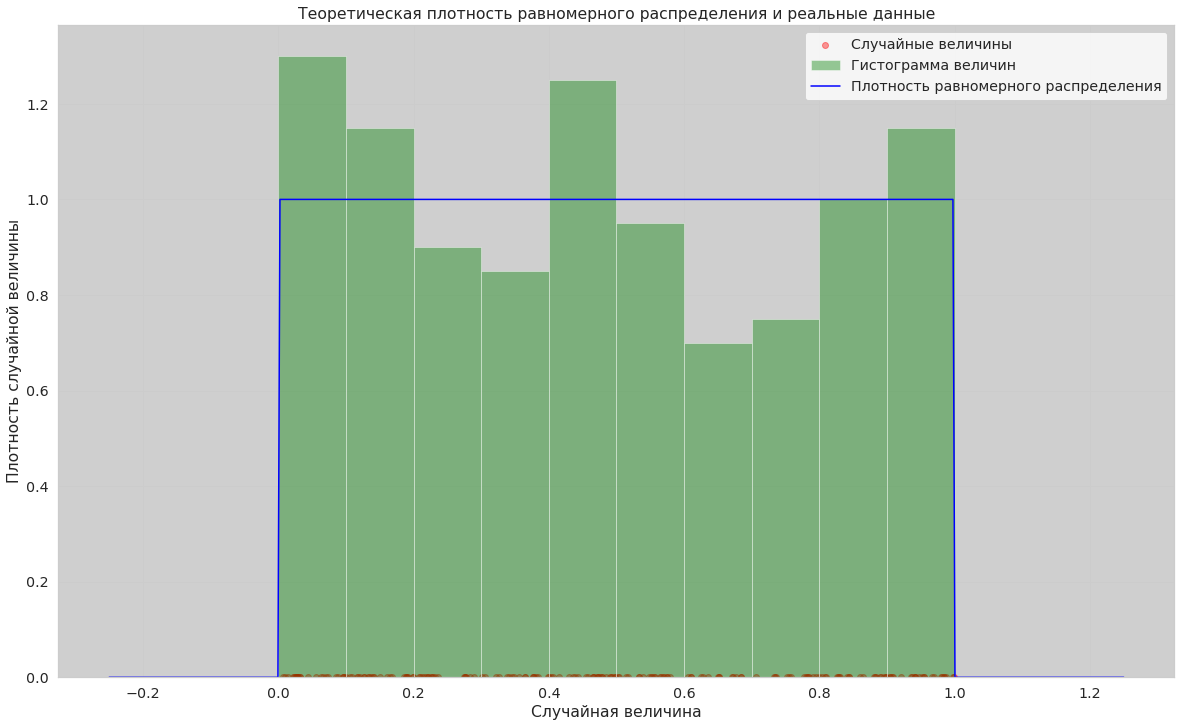

In [4]:
plot_uniform_density();

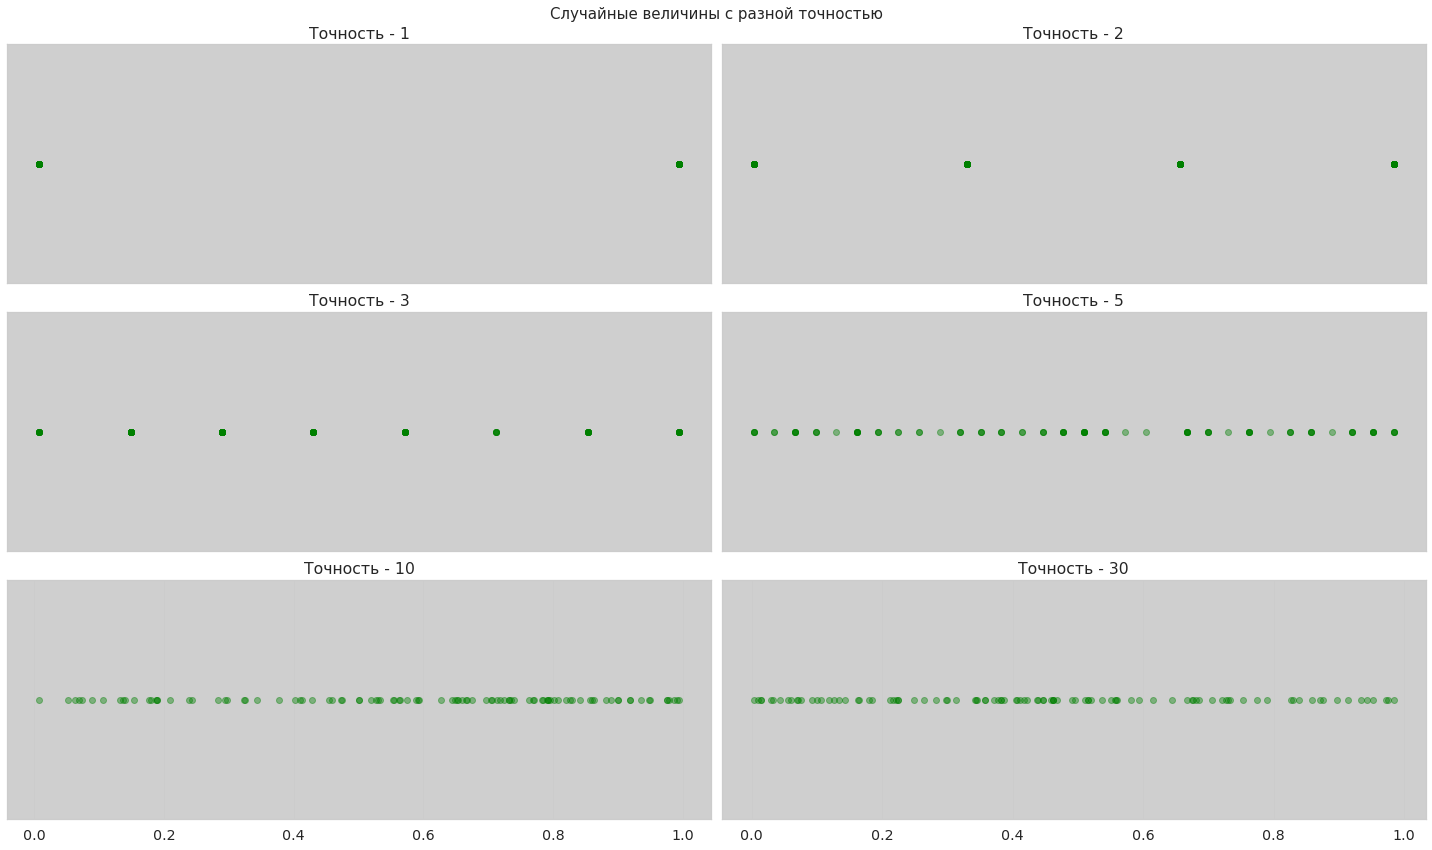

In [5]:
plot_uniform_different_precision();

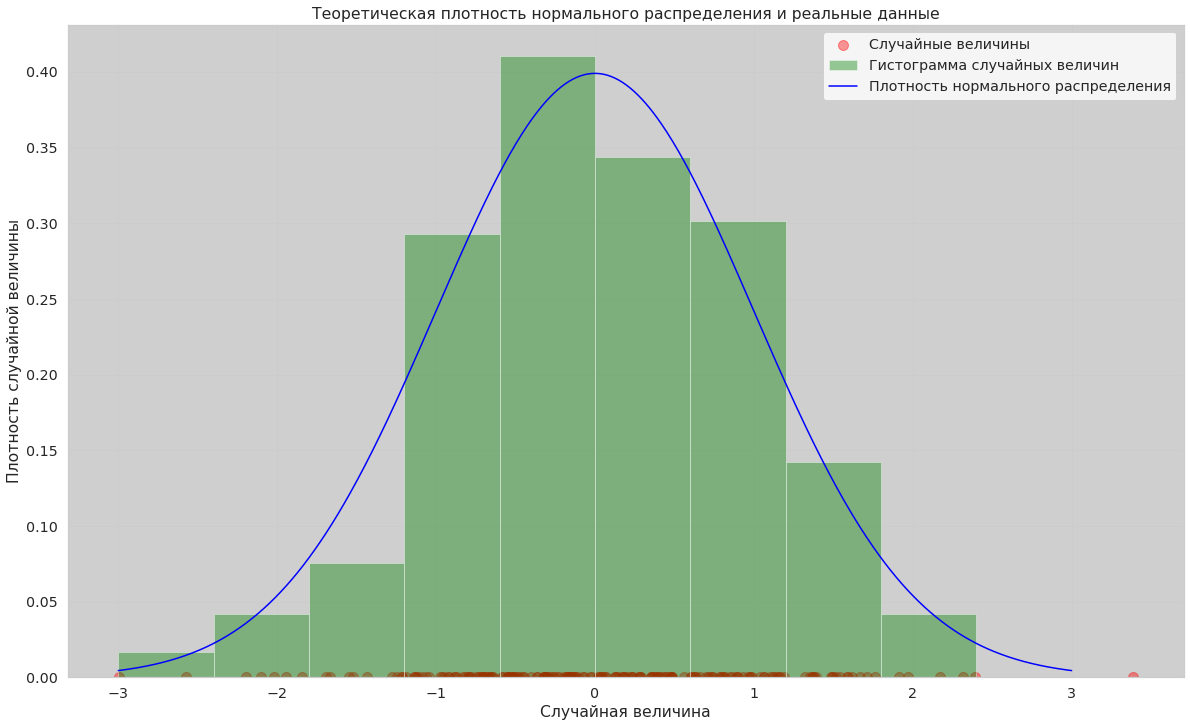

In [6]:
plot_normal_density();

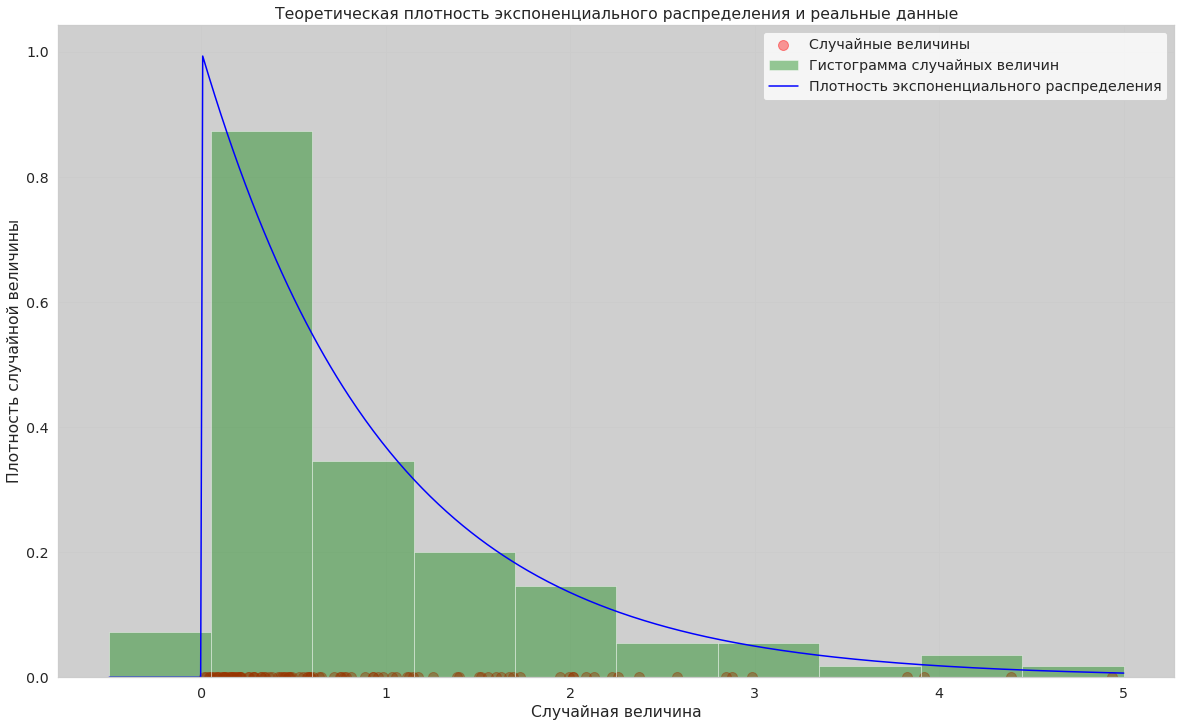

In [7]:
plot_expon_density();

**Выводы:**

Разлчные распределения можно получить с помощью Бернулли и плотность сгенерированных значений будет совпадать с распределениями. 

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

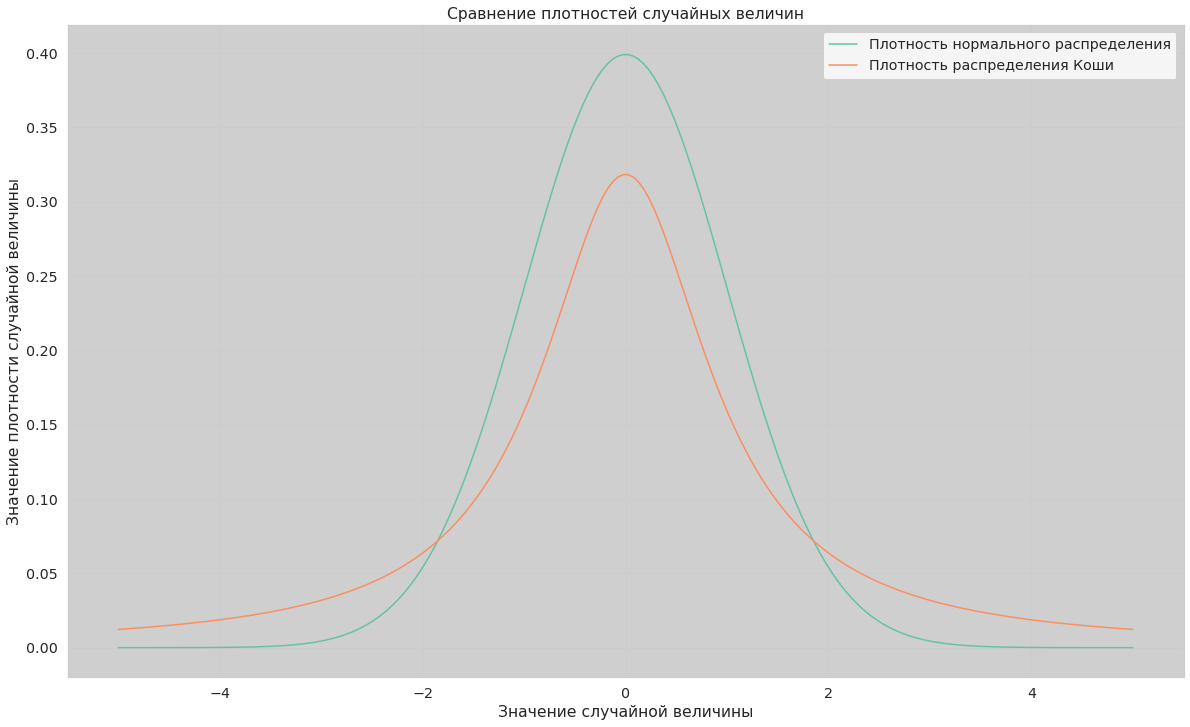

In [8]:
import scipy.stats as sps

plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

grid = np.linspace(-5.0, 5.0, 200)

plt.plot(grid, sps.norm(0, 1).pdf(grid), label = "Плотность нормального распределения")
plt.plot(grid, sps.cauchy(0, 1).pdf(grid), label = "Плотность распределения Коши")


plt.title("Сравнение плотностей случайных величин")
plt.xlabel("Значение случайной величины")
plt.ylabel("Значение плотности случайной величины")

plt.legend()

plt.grid(True)

Хвосты больше, чем у нормального распределения при тех же параметрах.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

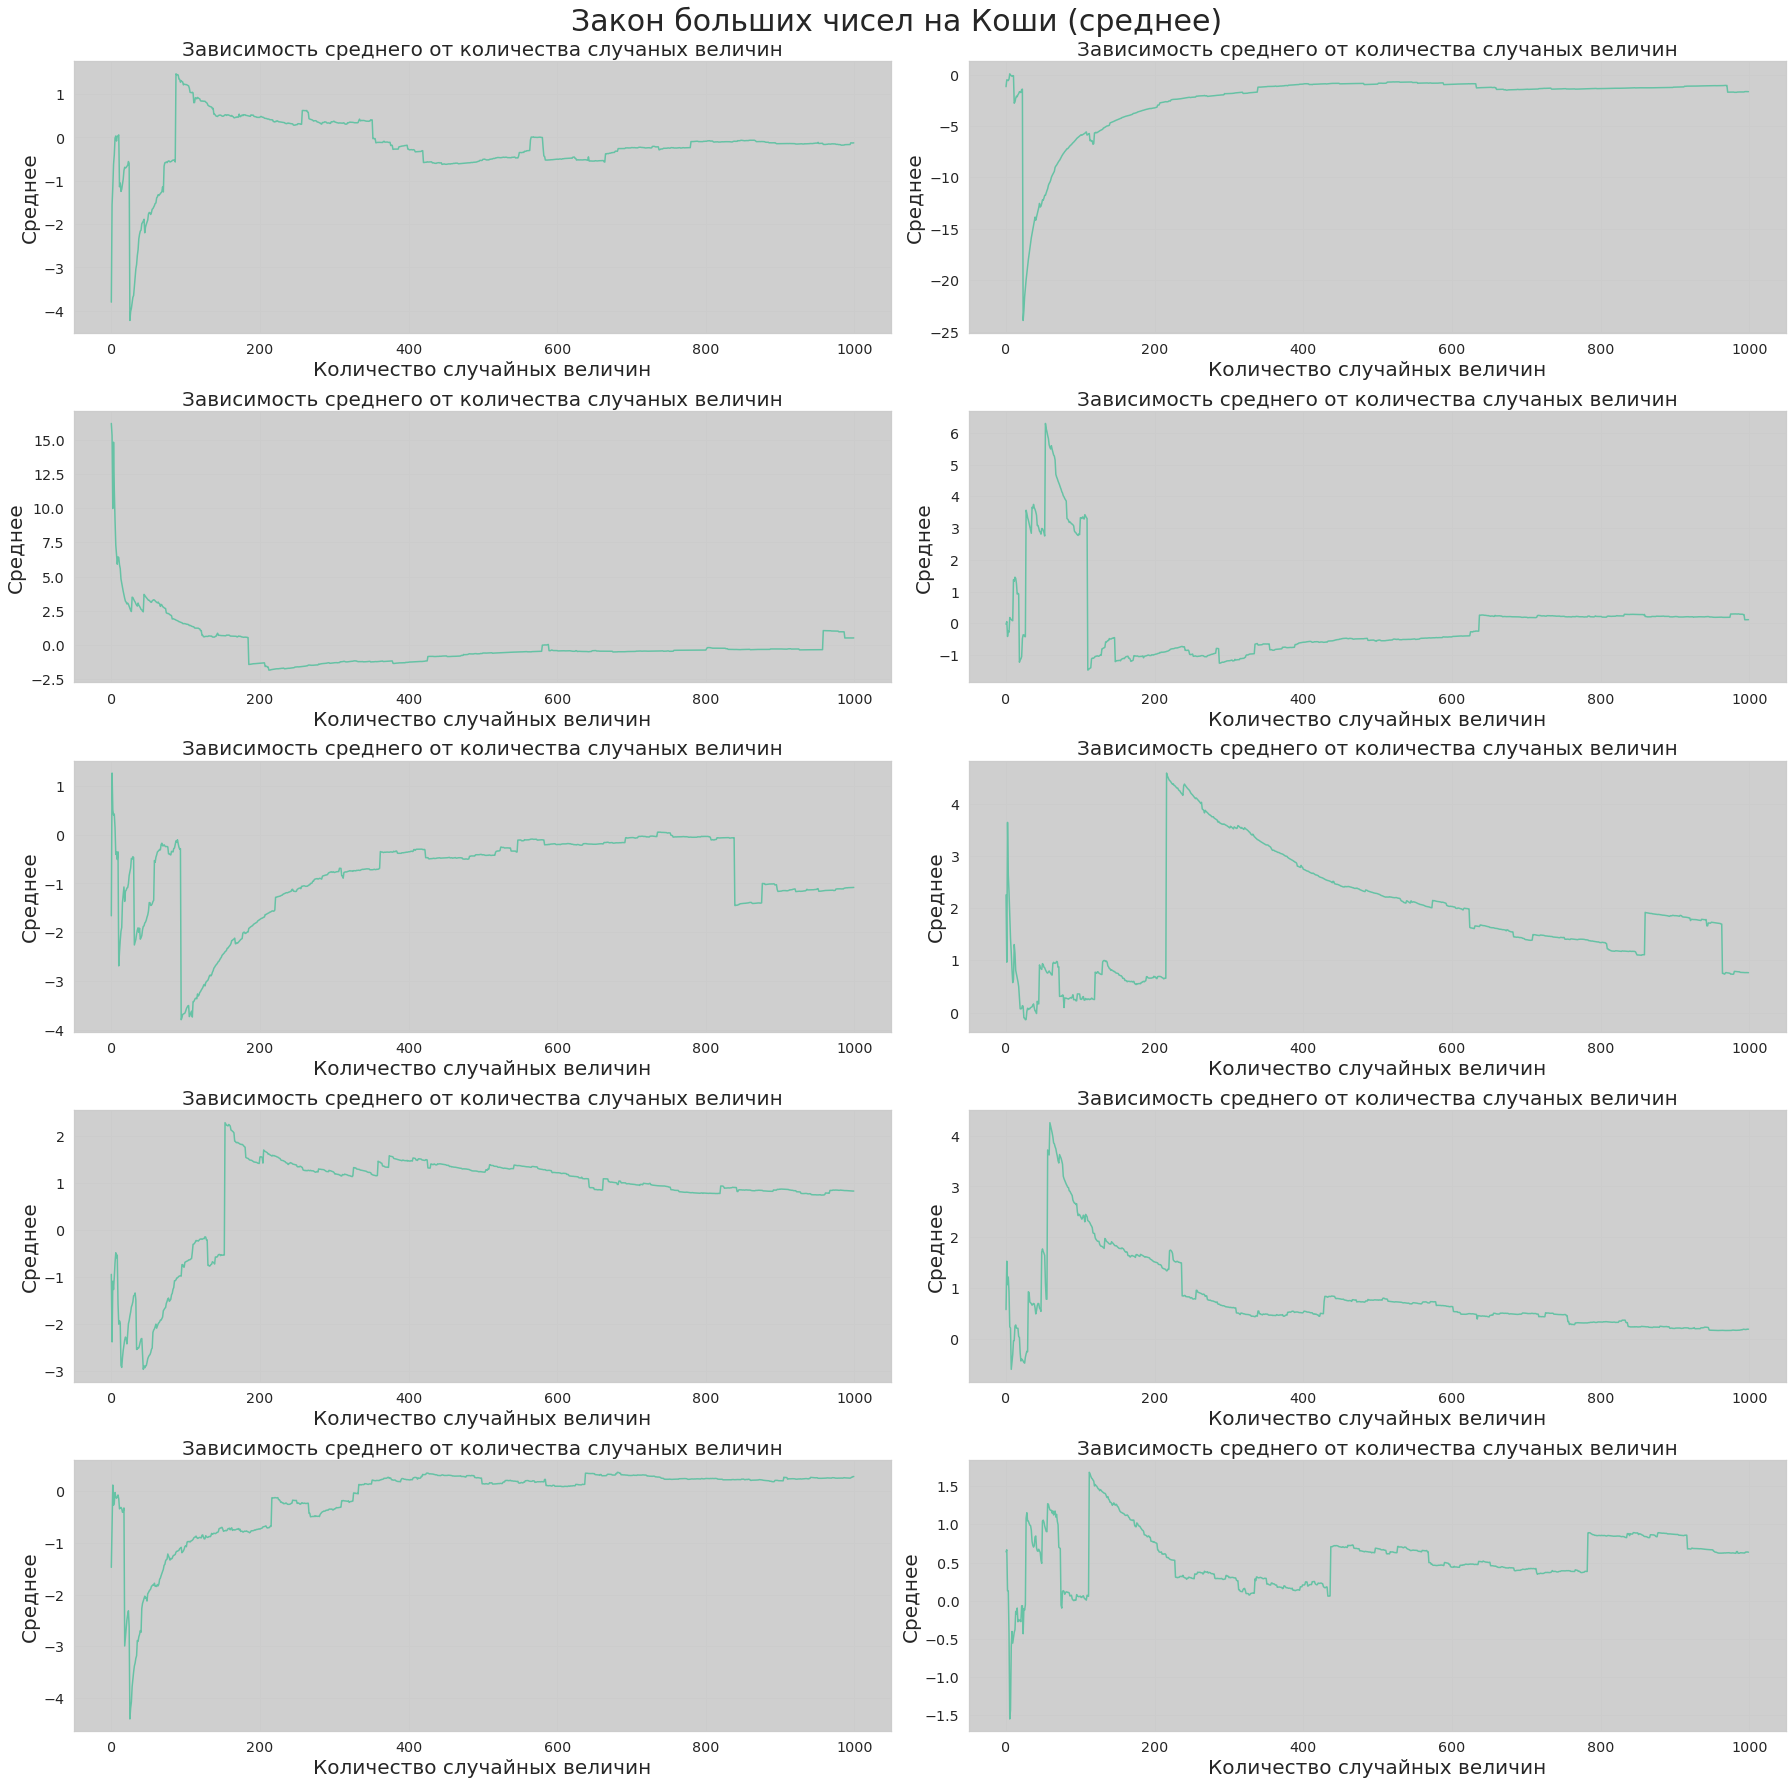

In [9]:
size = 1000

plt.figure(figsize=(25, 25))
plt.suptitle("Закон больших чисел на Коши (среднее)", fontsize = 30, y=0.99)

for i in range(10):

    samples = sps.cauchy().rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    plt.subplot(5, 2, i+1)
    plt.plot(cum_means)
    plt.xlabel('Количество случайных величин', fontsize = 20)
    plt.ylabel('Среднее', fontsize = 20)

    plt.title("Зависимость среднего от количества случаных величин", fontsize = 20)
    plt.gca().set_facecolor("#cfcfcf")

plt.tight_layout()
plt.grid(True)

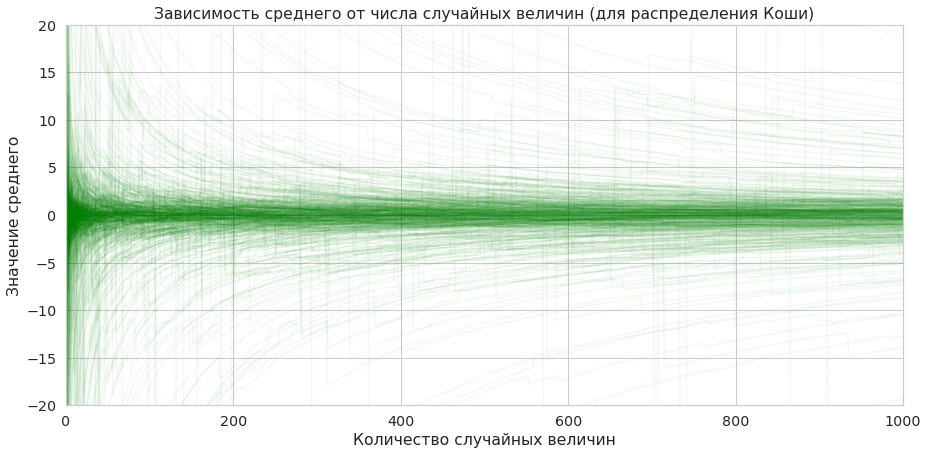

In [10]:
plt.figure(figsize=(15, 7))

size = 1000 
samples_count = 500

samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim(bottom = -20, top = 20);

plt.title("Зависимость среднего от числа случайных величин (для распределения Коши)")

plt.grid(True)

Закон Больших Чисел не выполняется из-за отсутствия мат ожидания, среднему не к чему сходиться, и из-за больших хвостов оно не сходится.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

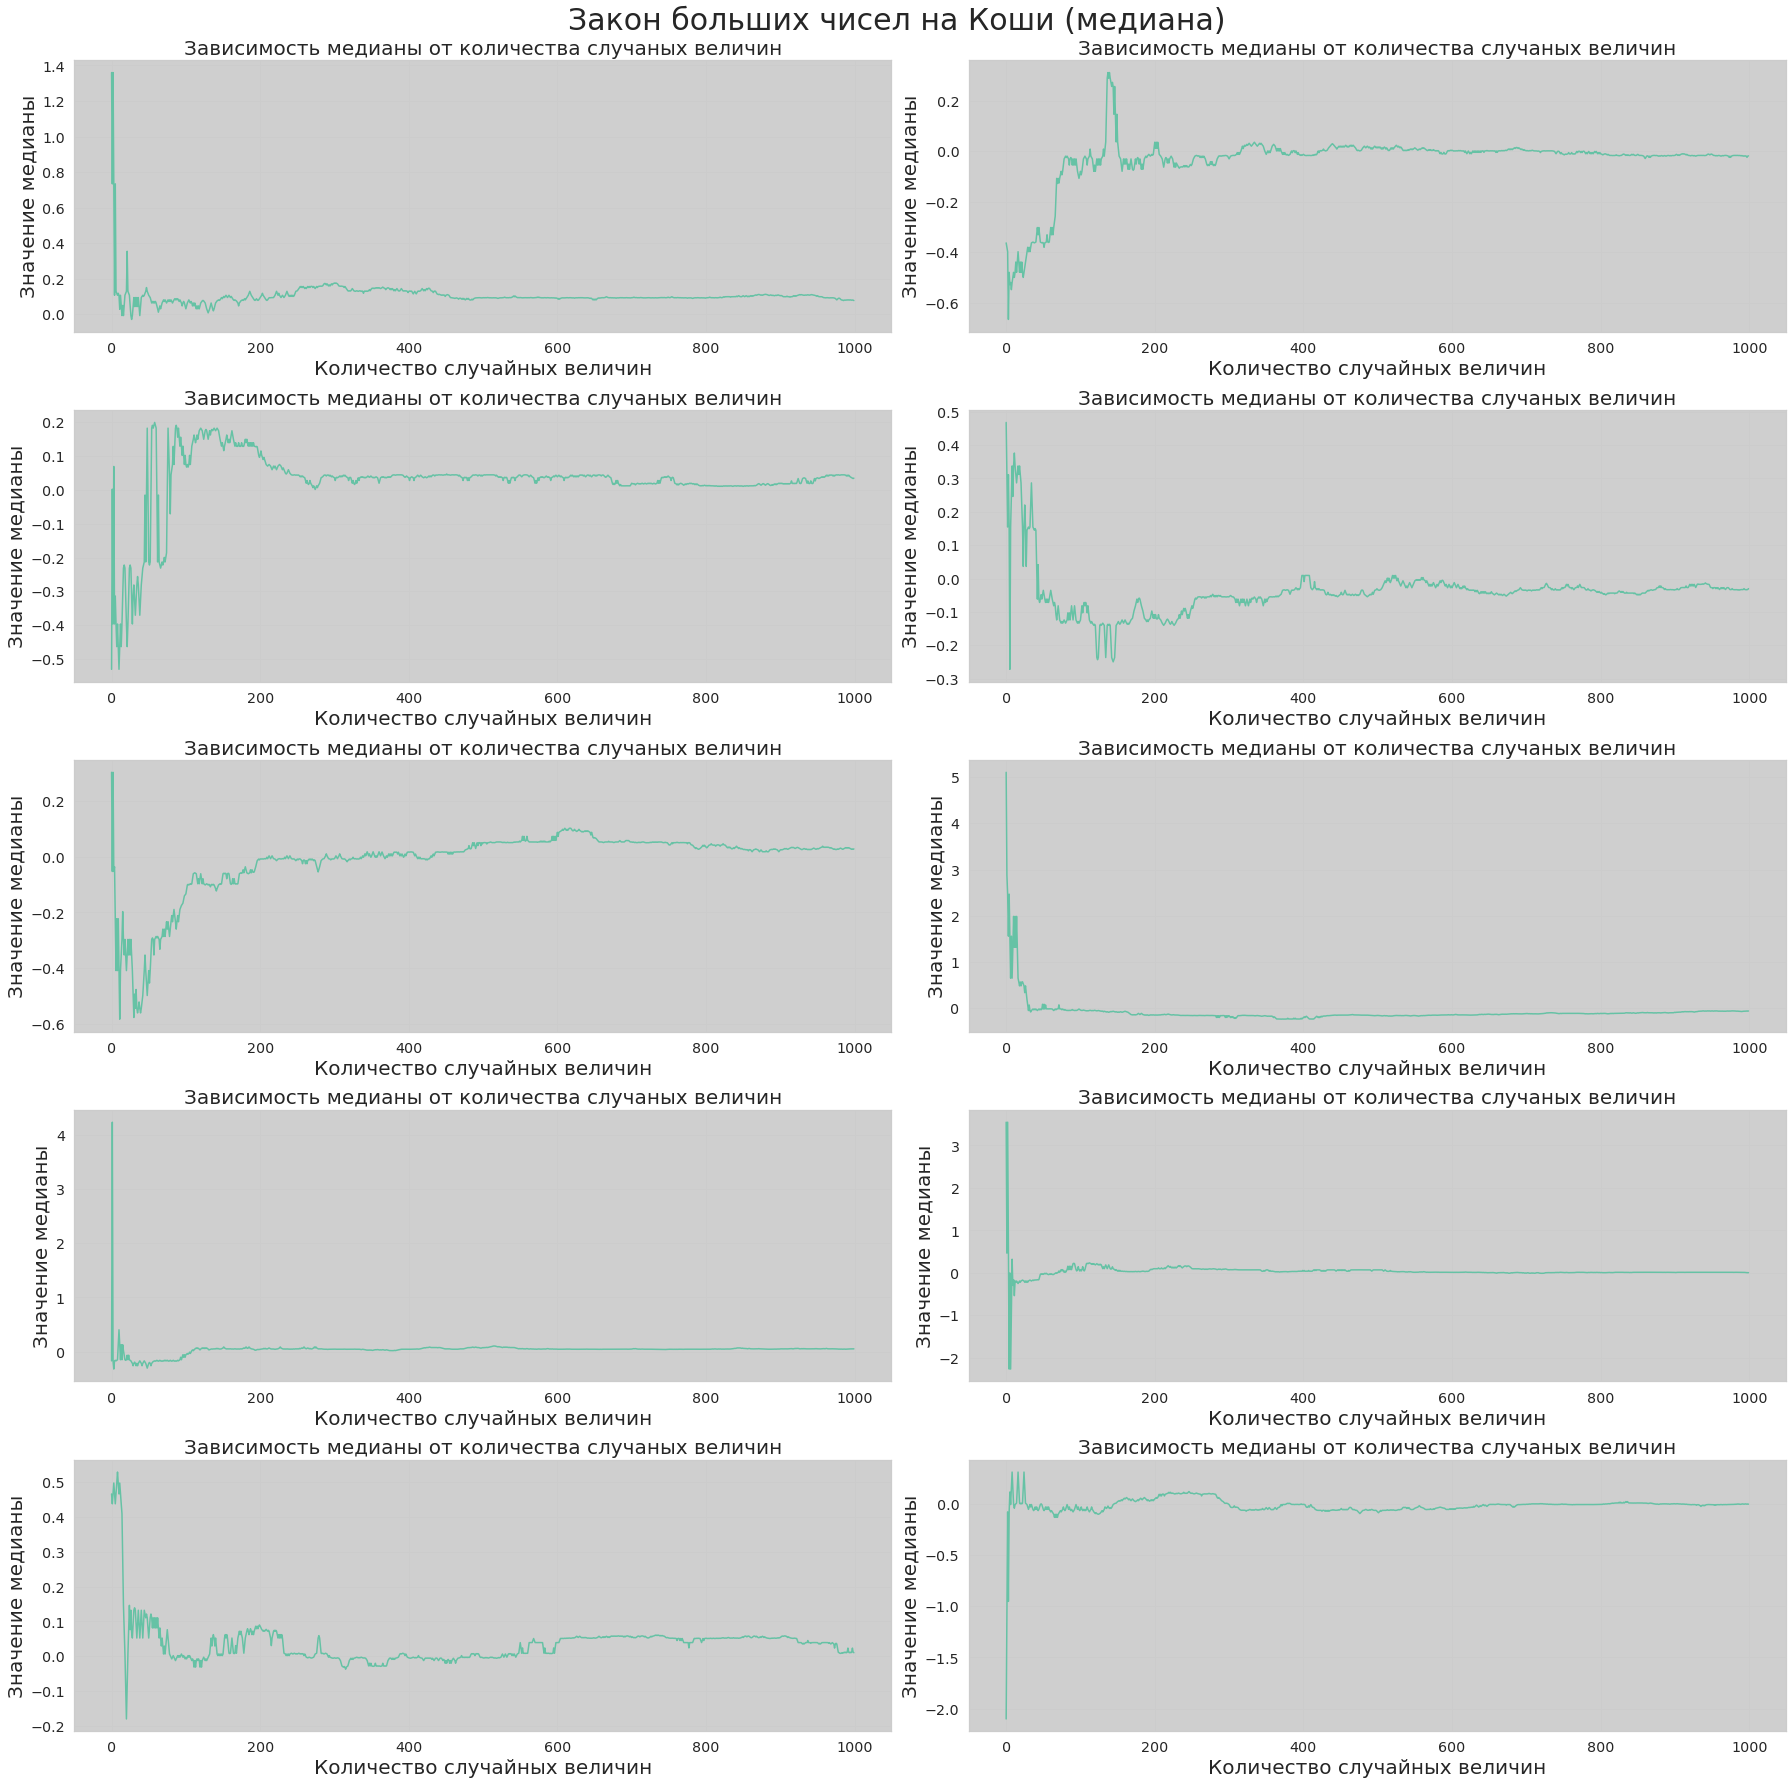

In [11]:
plt.figure(figsize=(25, 25))
plt.suptitle("Закон больших чисел на Коши (медиана)", fontsize = 30, y=0.99)

for i in range(10):

    samples = sps.cauchy().rvs(size=size)
    cum_medians = [np.median(samples[:i]) for i in range(1, size + 1)]
    
    plt.subplot(5, 2, i+1)
    plt.plot(cum_medians)
    plt.xlabel('Количество случайных величин', fontsize = 20)
    plt.ylabel('Значение медианы', fontsize = 20)

    plt.title("Зависимость медианы от количества случаных величин", fontsize = 20)
    plt.gca().set_facecolor("#cfcfcf")

    plt.grid(True)
    
plt.tight_layout()

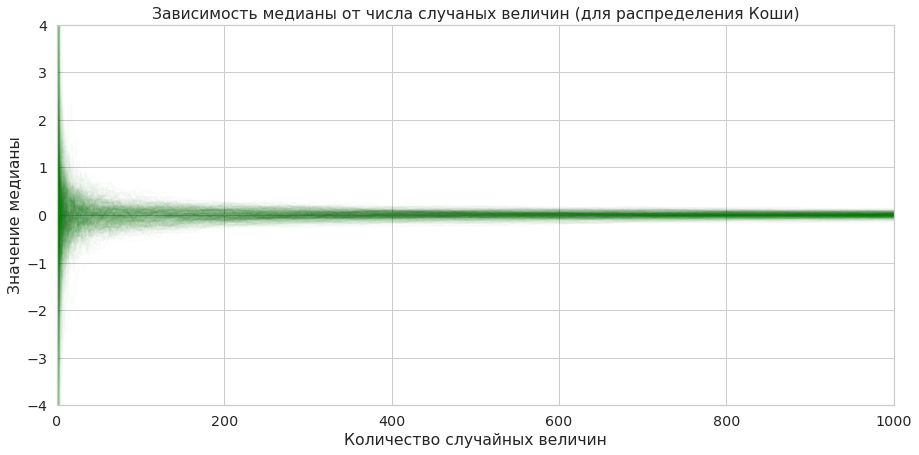

In [12]:
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    samples = sps.cauchy().rvs(size=size)
    cum_medians = [np.median(samples[:i]) for i in range(1, size + 1)]
    
    plt.plot(np.arange(size) + 1, cum_medians, color='green', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim((-4, 4))

plt.title("Зависимость медианы от числа случаных величин (для распределения Коши)")

plt.grid(True);

**Вывод:**

Хвосты не являются проблемой для медианы, поэтому она сходится к 0.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [13]:
import scipy.stats as sps

def get_sample_size(a = 0.5, K = 500, max_n = 1000):
  coin = sps.bernoulli(p=a).rvs

  bern_gen = coin((K, n))
  bern_gen_mean = bern_gen.cumsum(axis = 1) / (np.arange(n) + 1)
  bern_gen_dev = np.abs(bern_gen_mean - a)
  bern_gen_k_mean = bern_gen_dev.mean(axis = 0)

  min_n_threshold = np.min(np.where(bern_gen_k_mean <= 0.02)) + 1

  return bern_gen_k_mean, min_n_threshold

In [14]:
a = 0.5
coin = sps.bernoulli(p=a).rvs

n = 1000
K = 500

bern_gen_k_mean, min_n_threshold = get_sample_size(a, K, n)
print("necessary n:", min_n_threshold)

necessary n: 416


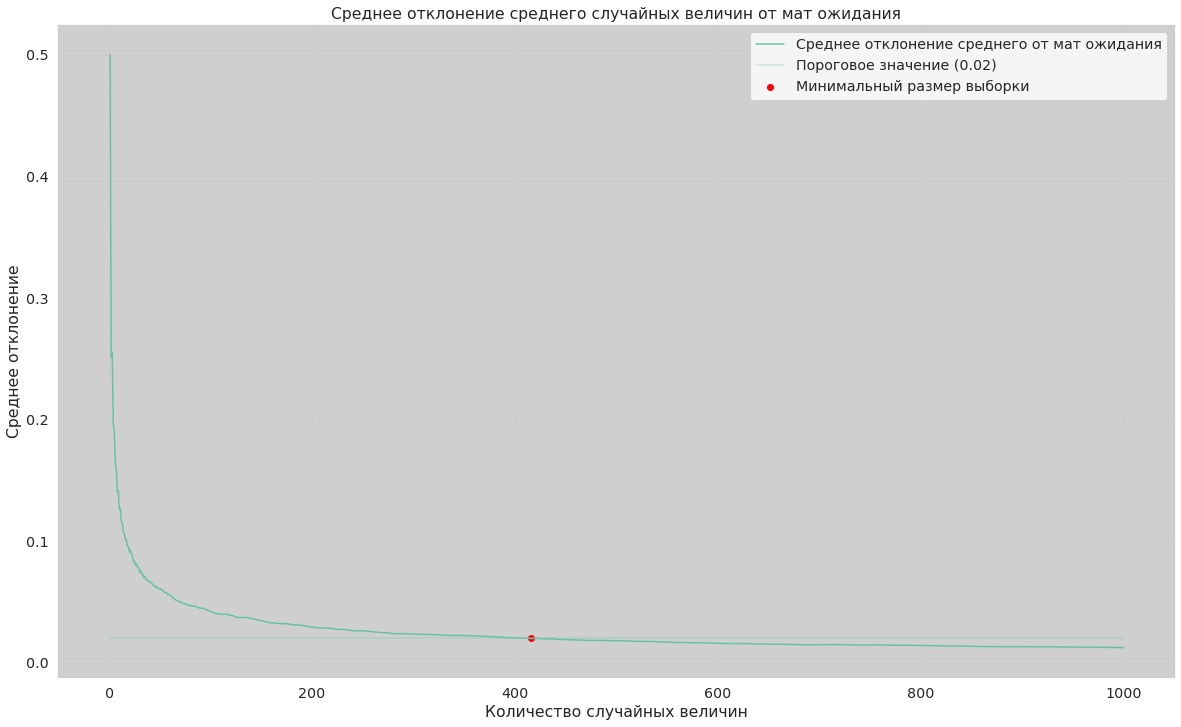

In [15]:
plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

plt.plot(np.arange(size) + 1, bern_gen_k_mean, label = 'Среднее отклонение среднего от мат ожидания')
plt.hlines(0.02, 0, size, alpha=0.3, label = 'Пороговое значение (0.02)')
plt.scatter(x = min_n_threshold, y = 0.02, color = 'red', label = 'Минимальный размер выборки')

plt.title('Среднее отклонение среднего случайных величин от мат ожидания')
plt.xlabel('Количество случайных величин')
plt.ylabel('Среднее отклонение')
    
plt.legend()
plt.show();

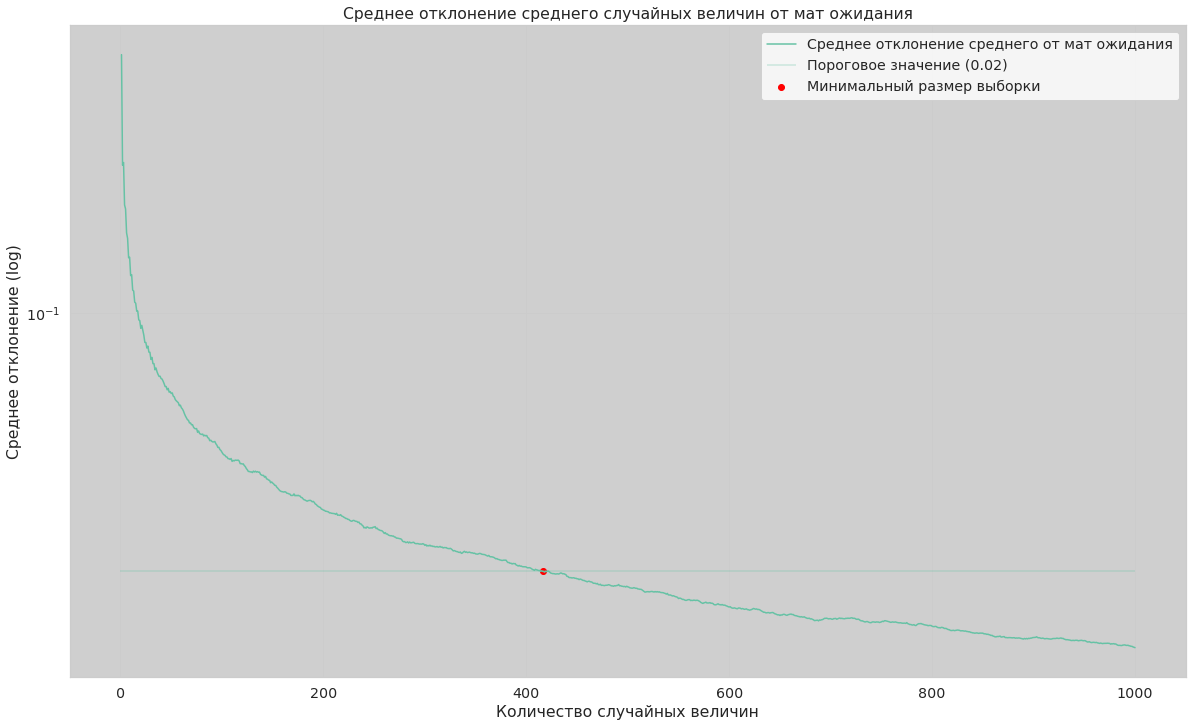

In [16]:
plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

plt.plot(np.arange(size) + 1, bern_gen_k_mean, label = 'Среднее отклонение среднего от мат ожидания')
plt.hlines(0.02, 0, size, alpha=0.3, label = 'Пороговое значение (0.02)')
plt.scatter(x = min_n_threshold, y = 0.02, color = 'red', label = 'Минимальный размер выборки')

plt.title('Среднее отклонение среднего случайных величин от мат ожидания')
plt.xlabel('Количество случайных величин')
plt.ylabel('Среднее отклонение (log)')

plt.yscale('log')

plt.legend()
plt.show();

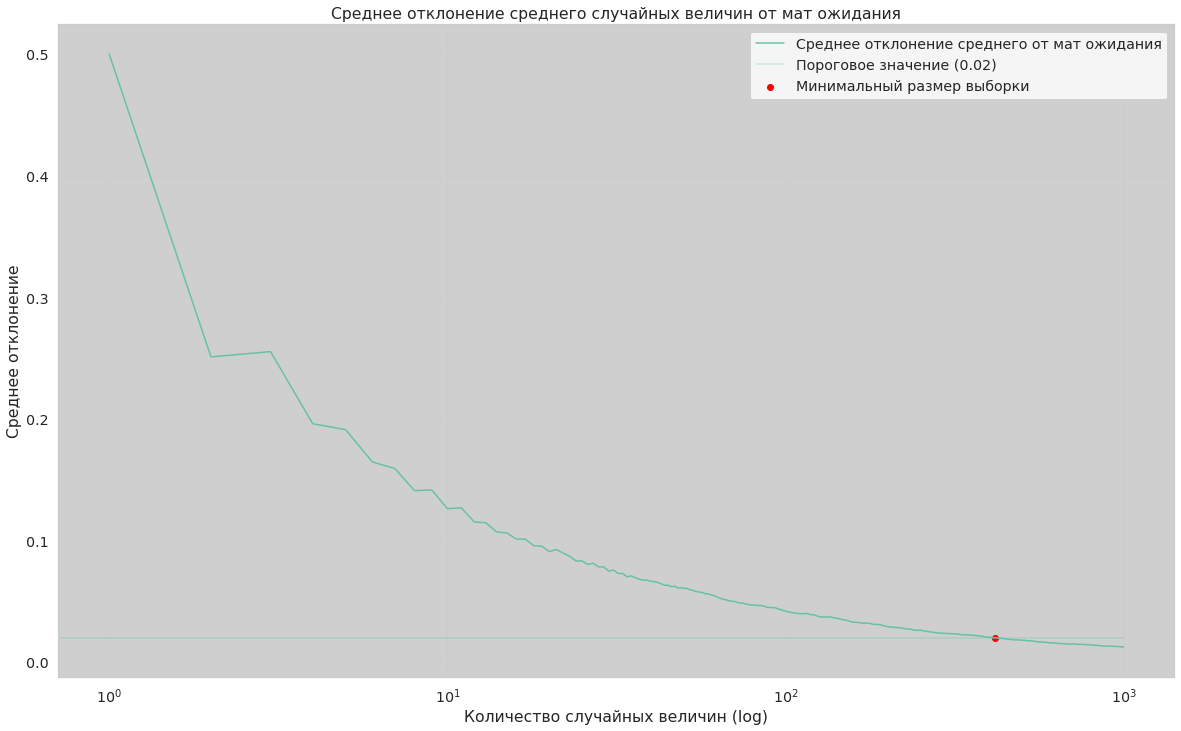

In [17]:
plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

plt.plot(np.arange(size) + 1, bern_gen_k_mean, label = 'Среднее отклонение среднего от мат ожидания')
plt.hlines(0.02, 0, size, alpha=0.3, label = 'Пороговое значение (0.02)')
plt.scatter(x = min_n_threshold, y = 0.02, color = 'red', label = 'Минимальный размер выборки')

plt.title('Среднее отклонение среднего случайных величин от мат ожидания')
plt.xlabel('Количество случайных величин (log)')
plt.ylabel('Среднее отклонение')

plt.xscale('log')

plt.legend()
plt.show();

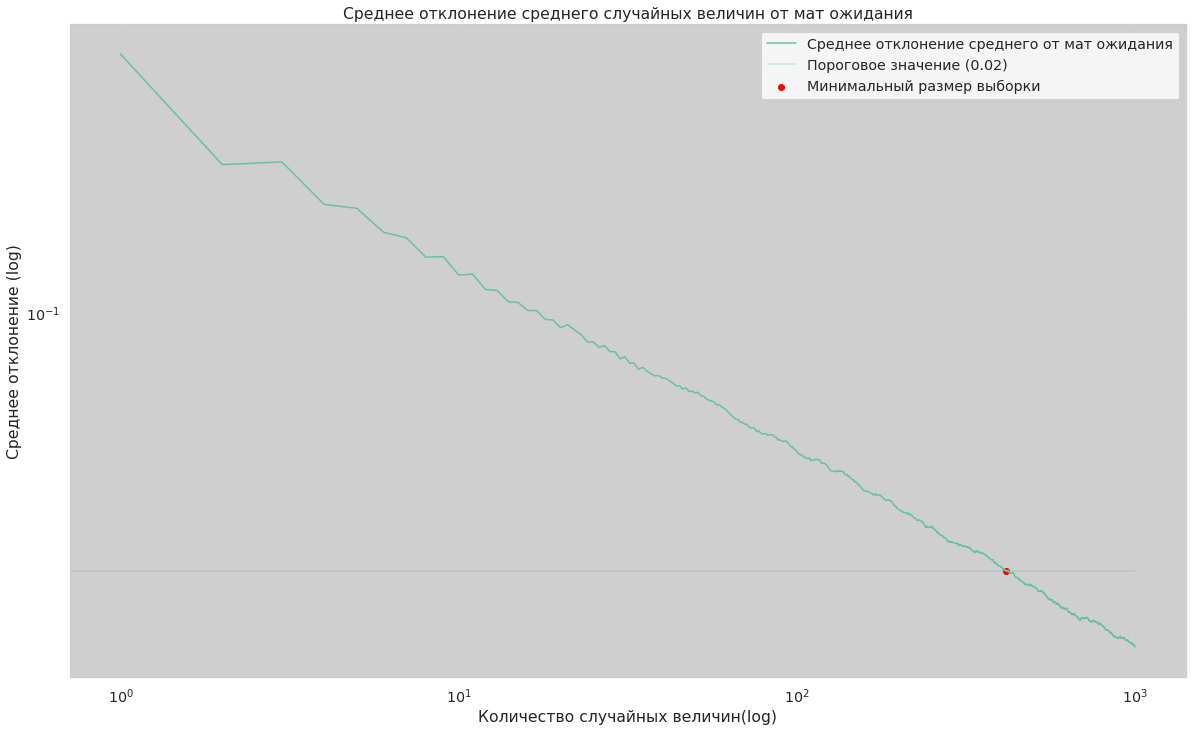

In [18]:
plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

plt.plot(np.arange(size) + 1, bern_gen_k_mean, label = 'Среднее отклонение среднего от мат ожидания')
plt.hlines(0.02, 0, size, alpha=0.3, label = 'Пороговое значение (0.02)')
plt.scatter(x = min_n_threshold, y = 0.02, color = 'red', label = 'Минимальный размер выборки')

plt.title('Среднее отклонение среднего случайных величин от мат ожидания')
plt.xlabel('Количество случайных величин(log)')
plt.ylabel('Среднее отклонение (log)')

plt.xscale('log')
plt.yscale('log')


plt.legend()
plt.show();

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [19]:
grid = np.linspace(0.05, 0.95, 19)

sample_sizes = []

for a in grid:
  sample_sizes.append(get_sample_size(a, K, n)[1])

sample_sizes

[76,
 150,
 207,
 250,
 308,
 370,
 339,
 360,
 376,
 418,
 415,
 363,
 408,
 302,
 275,
 235,
 206,
 138,
 77]

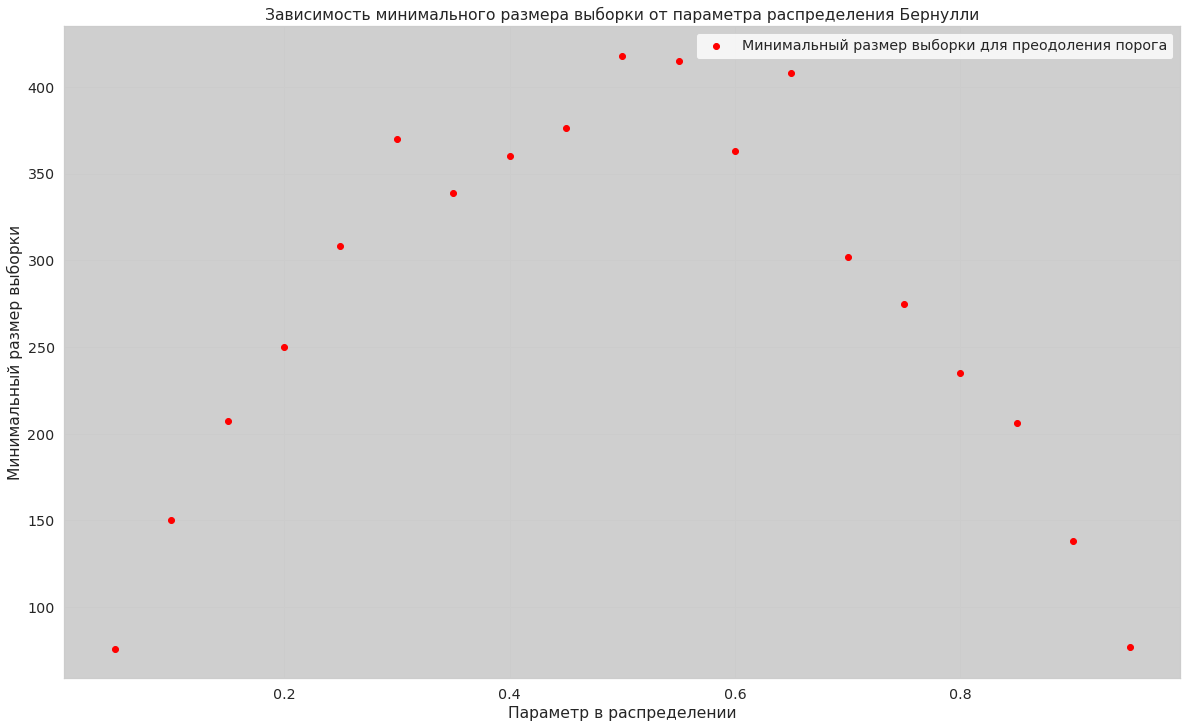

In [20]:
plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

plt.scatter(x = grid, y = sample_sizes, color = 'red', label = 'Минимальный размер выборки для преодоления порога')

grid_common = np.linspace(0.05, 0.95, 500)
coeff = np.polyfit(x = grid, y = sample_sizes, deg = 2)

plt.title('Зависимость минимального размера выборки от параметра распределения Бернулли')
plt.xlabel('Параметр в распределении')
plt.ylabel('Минимальный размер выборки')
    
plt.legend()
plt.show();

In [21]:
grid = np.linspace(0.05, 0.95, 100)

sample_sizes = []

for a in grid:
  sample_sizes.append(get_sample_size(a, K, n)[1])

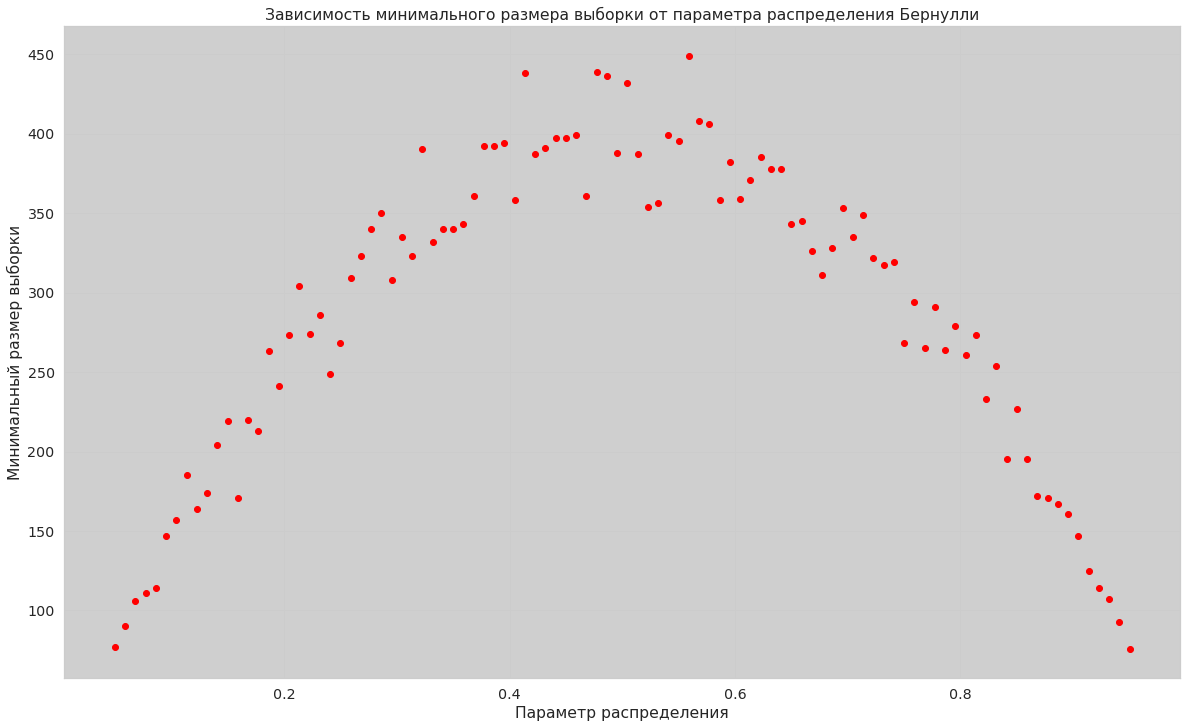

In [22]:
plt.figure(figsize = (20, 12))
plt.gca().set_facecolor("#cfcfcf")

plt.scatter(x = grid, y = sample_sizes, color = 'red')

grid_common = np.linspace(0.05, 0.95, 500)
coeff = np.polyfit(x = grid, y = sample_sizes, deg = 2)

plt.title('Зависимость минимального размера выборки от параметра распределения Бернулли')
plt.xlabel('Параметр распределения')
plt.ylabel('Минимальный размер выборки')
    
plt.show();

**Выводы:**

1) С увеличением размера выборок начинает расти точность.

2) Зависимость размера выборки от параметра для распределения Бернулли описывается параболой, для крайних значений нужно меньше объектов.
